
# Data Science meets Software Data
<b>Markus Harrer</b>, Software Development Analyst
  
`@feststelltaste`


<small>JavaLand 2019, Phantasialand, Brühl, 19.03.2019</small>

<img src="../resources/innoq_logo.jpg" width=20% height="20%" align="right"/>

## Data Science

### Was ist Data Science?

"**Statistik** auf nem <b><span class="green">Mac</span></b>."
<br/>
<br/>
<div align="right"><small>Nach https://twitter.com/cdixon/status/428914681911070720</small></div>

### Meine Definition

#### Was bedeutet "**data**"?
"Without **data** you‘re just another person with an opinion."
<br/>
<div align="right"><small>W. Edwards Deming</small></div>

<b>=> Belastbare Erkenntnisse mittels <span class="green">Fakten</span> liefern</b>

#### Was bedeutet "**science**"?
  
  
"The aim of **science** is to seek the simplest explanations of complex facts."
<br/>
<div align="right"><small>Albert Einstein</small></div>

<b>=> Neue Erkenntnisse <span class="green">verständlich</span> herausarbeiten</b>

### Was ist ein Data Scientist?
"Jemand, der mehr Ahnung von **Statistik**<br/>
&nbsp;&nbsp;hat als ein <b><span class="green">Softwareentwickler</span></b><br/>
&nbsp;&nbsp;und mehr Ahnung von <b><span class="green">Softwareentwicklung</span></b><br/>
&nbsp;&nbsp;als ein **Statistiker**."
<br/>
<br/>
<div align="right"><small>Nach zu https://twitter.com/cdixon/status/428914681911070720</small></div>

<b>Data Science & Software Data:</b> **Perfect** <b><span class="green">match</span></b>!

## Software Data

### Was ist Software Data?

* Statisch
* Laufzeit
* Chronologisch
* Community

<b>=> Krass viel!</b>

### Beispiele für Analysen

* Performance-Bottlenecks
* Verborgene Teamkommunikation
* No-Go-Areas
* Architektur-/Design-/Code-Smells
* ...

## Vorgehen

1. Fragestellung
2. Datenbeschaffung
3. Modellierung
4. Interpretation
5. Kommunikation

<b>=> vom <strong>Problem</strong> über die <span class="green">Daten</span> zur <span class="blue" style="background-color: #FFFF00">Erkenntnis</span>!</b>

## Grundprinzip

<code>
(Data + Code + Ergebnis) * Automatisierung
= Reproduzierbare Analysen</code>

Schlüssel: **Computational notebooks**

### Der Notebook-Ansatz
<br/>
  

<div align="center"><img src="../resources/notebook_approach.jpg"></div>

## Technik

### Technologie (1/2)
Klassischer Data-Science-Werkzeugkasten
* **Jupyter** (mit RISE)
* Python 3
* pandas
* matplotlib

### Technologie (2/2)
**Jupyter** funktioniert und integriert sich auch mit
* Cypher / Neo4j / jQAssistant
* JVM-Sprachen über beakerx / Tablesaw
* bash
* ...

# Praktischer Teil

## Erstes Hands-On

### Der Patient

#### Linux

* Betriebsystem-Kernel
* Hat verschiedene Treiberkomponenten
* Fast ausschließlich in C geschrieben
* Entwickelt von über 800.000 Entwicklern

### I. Idee (1/2)

<b>Fragestellung</b>
* Gibt es besonders alte Komponenten (No-Go-Areas)?


### I. Idee (2/2)
#### Umsetzung
* Werkzeuge: Jupyter, Python, pandas, matplotlib
* Datenquelle: Git Blame Log


**Meta-Ziel:** Grundfunktionen anhand eines einfachen Show-Cases sehen.

<b>Git Blame Log</b>
<div align="center">
    <img src ="../resources/linux_1.gif" align="center"/>
</div>

<b>Git Blame Log</b>
<div align="center">
    <img src ="../resources/linux_2.gif" align="center"/>
</div>

<b>Git Blame Log</b>
<div align="center">
    <img src ="../resources/linux_3.gif" align="center"/>
</div>

### II. Datenbeschaffung
*Wir laden Git Blame Daten aus einer CSV-Datei*

In [1]:
import pandas as pd

log = pd.read_csv("../dataset/linux_blame_log.csv.gz")
log.head()

,path,author,timestamp,line
0,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,1448528085000000000,1
1,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,1448528085000000000,2
2,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,1448528085000000000,3
3,drivers/scsi/bfa/bfad_drv.h,Jing Huang,1253753175000000000,4
4,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,1448528085000000000,5


*Was haben wir hier eigentlich?*

In [2]:
log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5665947 entries, 0 to 5665946
Data columns (total 4 columns):
path         object
author       object
timestamp    int64
line         int64
dtypes: int64(2), object(2)
memory usage: 172.9+ MB


<b>1</b> **DataFrame** (~ programmierbares Excel-Arbeitsblatt), <b>4</b> **Series** (= Spalten), <b>5665947</b> **Rows** (= Einträge)

### III. Bereinigen
* Daten sind oft nicht so, wie man sie braucht
* Datentypen passen teilweise noch nicht

*Wir wandeln die Zeitstempel um*

In [3]:
log['timestamp'] = pd.to_datetime(log['timestamp'])
log.head()

,path,author,timestamp,line
0,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,1
1,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,2
2,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,3
3,drivers/scsi/bfa/bfad_drv.h,Jing Huang,2009-09-24 00:46:15,4
4,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,5


### IV. Anreichern

* Vorhandenen Daten noch zusätzlich mit anderen Datenquellen verschneiden
* Aber auch: Teile aus vorhanden Daten extrahieren

=> Dadurch werden mehrere <b>Perspektiven</b> auf ein Problem möglich

*Wir berechnen uns das Alter jeder Codezeilenänderung*

In [4]:
log['age'] = pd.Timestamp('today') - log['timestamp']
log.head()

,path,author,timestamp,line,age
0,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,1,1208 days 08:19:44.742910
1,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,2,1208 days 08:19:44.742910
2,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,3,1208 days 08:19:44.742910
3,drivers/scsi/bfa/bfad_drv.h,Jing Huang,2009-09-24 00:46:15,4,3462 days 16:28:14.742910
4,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,5,1208 days 08:19:44.742910


*Wir ordnen jeder Zeilenänderung einer Komponente zu*

In [5]:
log['component'] = log['path'].str.split("/").str[:2].str.join(":")
log.head()

,path,author,timestamp,line,age,component
0,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,1,1208 days 08:19:44.742910,drivers:scsi
1,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,2,1208 days 08:19:44.742910,drivers:scsi
2,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,3,1208 days 08:19:44.742910,drivers:scsi
3,drivers/scsi/bfa/bfad_drv.h,Jing Huang,2009-09-24 00:46:15,4,3462 days 16:28:14.742910,drivers:scsi
4,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,5,1208 days 08:19:44.742910,drivers:scsi


<br/> <small><i>String-Operationen...die dauern. Gibt aber diverse Optimierungsmöglichkeiten!</i></small>

### V. Aggregieren
* Vorhandene Daten sind oft zu viel für manuelle Sichtung
* Neue Einsichten über Problem aber oft auf hoher Flugbahn möglich

*Wir fassen nach Komponenten zusammen und arbeiten mit der jeweils jüngsten Zeilenänderung weiter*

In [6]:
age_per_component = log.groupby("component")['age'].min().sort_values()
age_per_component.head()

component
drivers:scsi   340 days 23:48:20.742910
drivers:i2c    341 days 01:08:55.742910
drivers:net    341 days 01:24:11.742910
drivers:of     341 days 17:43:13.742910
drivers:pci    341 days 21:30:08.742910
Name: age, dtype: timedelta64[ns]

### IV. Visualisieren
* Grafische Darstellung geben Analysen den letzten Schliff
* Probleme können Außenstehenden visuell dargestellt besser kommuniziert werden

*Wir bauen ein Diagramm mit min. Alter pro Komponente*

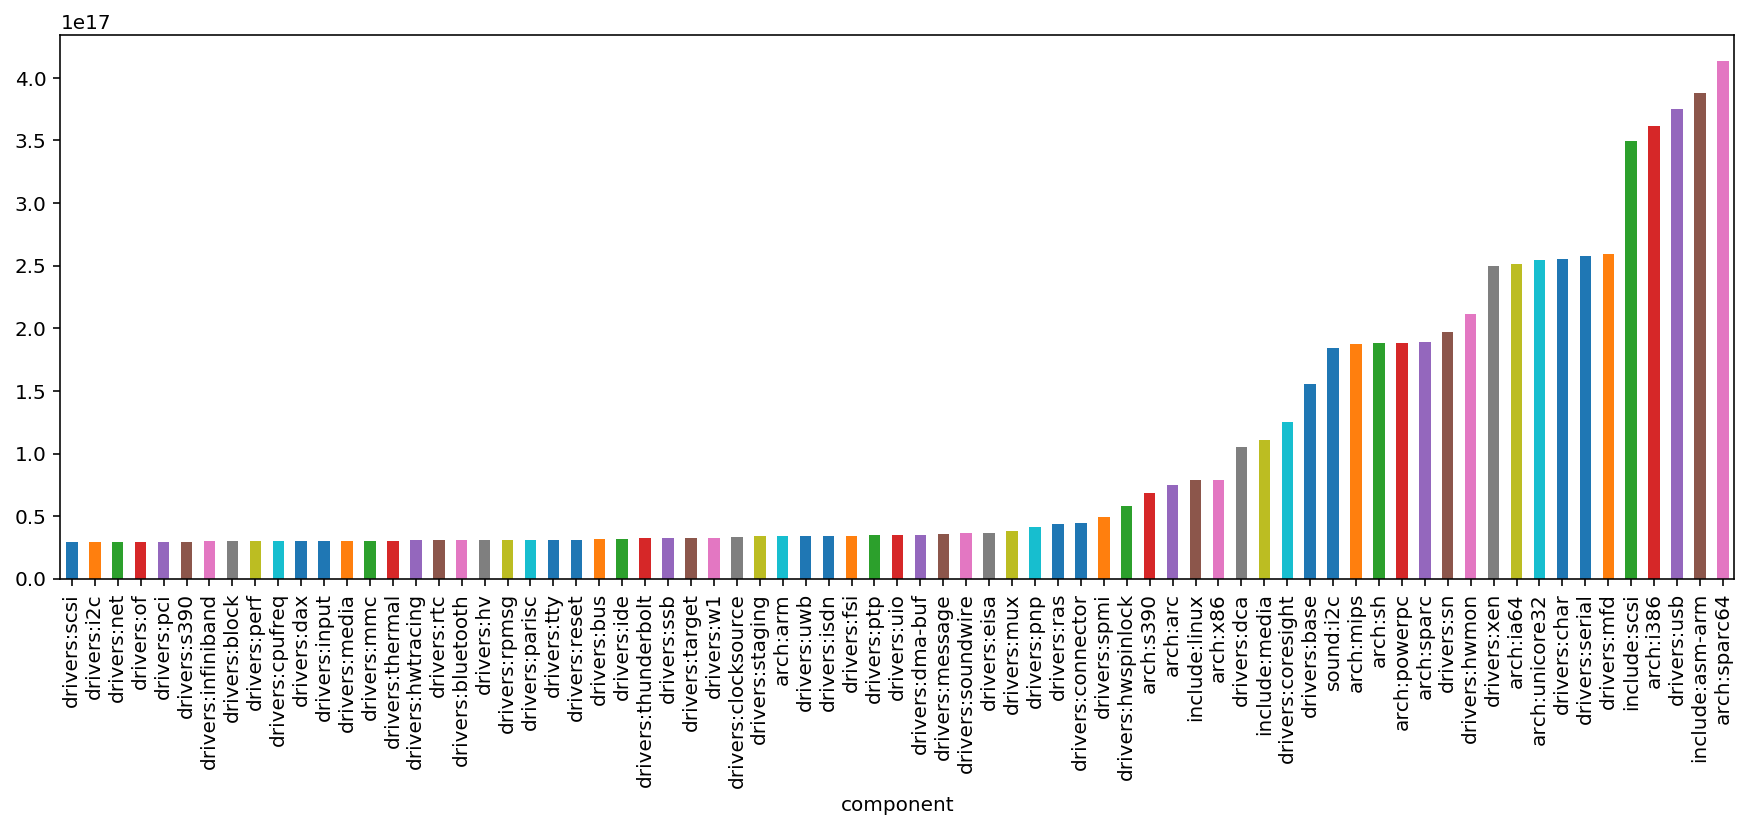

In [7]:
age_per_component.plot.bar(figsize=[15,5]);

## Weitere Analysen

* Bewertung von CPU-Performance-Problemen
* Performance-Hotspots mit Neo4j
* Priorisieren von Aufräumarbeiten mit Tablesaw

## Ausblick

# <strong>E</strong><span class="grey"><b>D</b></span><span class="green"><b>V</b></span> mit **OZAPFDIS**, <span class="grey"><b>pandas</b></span> und <span class="green"><b>AUSI</b></span>

Beispiel: Abhängigkeitsanalyse mit Daten von `jdeps` und Visualisierung mit `D3`.

## Zusammenfassung
**1.** <b>Analysen</b> mit Standard-Werkzeugen <b>einfach</b> möglich  
**2.** Wer mehr will bekommt auch <b>mehr</b>!  
**3.** Es gibt unglaublich <b>viele Quellen</b> für Daten in der Softwareentwicklung  

<b>=> vom <strong>Problem</strong> über die <span class="green">Daten</span> zur <span class="blue" style="background-color: #FFFF00">Erkenntnis</span>!</b>

## Literatur
* Adam Tornhill: Software Design X-Ray 
* Wes McKinney: Python For Data Analysis
* Leek, Jeff: The Elements of Data Analytic Style
* Tim Menzies, Laurie Williams, Thomas Zimmermann: Perspectives on Data Science for Software Engineering

# Vielen Dank! Fragen?

<b>Markus Harrer</b><br/>
innoQ Deutschland GmbH
  
markus.harrer@innoq.com 

`@feststelltaste`

<small>Demos & "Slides": https://github.com/feststelltaste/software-analytics => demos/20190319_JavaLand_Bruehl/</small>
<img src="../resources/innoq_logo.jpg" width="20%" heigth="20%" align="right"/>